In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def euler(f, h0, t0, t1, steps):
    ...
    return h

def rk4(f, h0, t0, t1, steps):
    ...
    return h



g = 9.81

def true_projectile_ode(t, h):
    ...
    return deriv

# -------------------------------------------------
# Neural ODE surrogate for 2D projectile motion
#    state h = [x, y, vx, vy]
# -------------------------------------------------

class NeuralProjectileODE(nn.Module):
    # linear -> tanh -> linear
    def __init__(self, hidden=64):
        # many missing lines
        ...
        ...
        ...

    def forward(self, t, h):
        ...
        ...
        return ...

def trajectory(method, f, h0, t0, t1, steps):
    ...
    return ts, hs

v0 = ...
angle_deg = ...
angle_rad = ...

x0, y0 = 0.0, 0.0
vx0 = ...
vy0 = ...

h0 = torch.tensor([x0, y0, vx0.item(), vy0.item()], dtype=torch.float32)

t_flight = 2 * vy0 / g
t0, t1 = 0.0, t_flight.item()
steps = 10

# -------------------------------------------------
# Train neural surrogate to match analytic projectile dynamics
# -------------------------------------------------
# mse loss, adam optimizer

torch.manual_seed(0)
model = ...
criterion = ...
optimizer = ...(..., lr=...)

batch_size = 128
train_steps = 800
for step in range(1, train_steps + 1):
    t_batch = torch.zeros(batch_size)
    h_batch = torch.empty(batch_size, 4)
    h_batch[:, 0].uniform_(0, 80)   # x
    h_batch[:, 1].uniform_(0, 60)   # y
    h_batch[:, 2].uniform_(0, 40)   # vx
    h_batch[:, 3].uniform_(-5, 40)  # vy

    target = ...
    pred = ...
    loss = ...

    # three important things when dealing wih pytorch and training:
    ............
    ............
    .............

    if step % 200 == 0:
        print(f"Step {step}/{train_steps} - loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    ts_euler, hs_euler = ...
    ts_rk4, hs_rk4 = ...


with torch.no_grad():
    ts_true = torch.linspace(t0, t1, 400)
    x_true = x0 + vx0 * ts_true
    y_true = y0 + vy0 * ts_true - 0.5 * g * ts_true ** 2

Step 200/800 - loss: 58.3200
Step 400/800 - loss: 24.6758
Step 600/800 - loss: 10.5186
Step 800/800 - loss: 8.7826


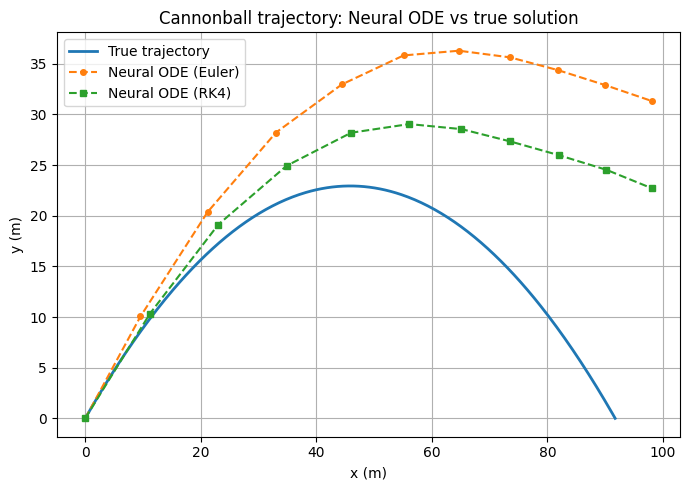

In [2]:
plt.figure(figsize=(7, 5))
plt.plot(x_true.numpy(), y_true.numpy(), label="True trajectory", linewidth=2)
x_euler = hs_euler[:, 0]
y_euler = hs_euler[:, 1]
plt.plot(x_euler.numpy(), y_euler.numpy(), "o--", label="Neural ODE (Euler)", markersize=4)
x_rk4 = hs_rk4[:, 0]
y_rk4 = hs_rk4[:, 1]
plt.plot(x_rk4.numpy(), y_rk4.numpy(), "s--", label="Neural ODE (RK4)", markersize=4)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cannonball trajectory: Neural ODE vs true solution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

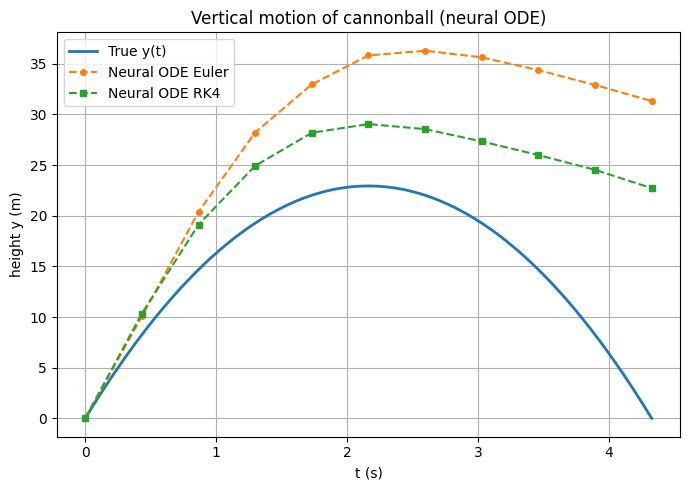

In [3]:
plt.figure(figsize=(7, 5))
plt.plot(ts_true.numpy(), y_true.numpy(), label="True y(t)", linewidth=2)
plt.plot(ts_euler.numpy(), y_euler.numpy(), "o--", label="Neural ODE Euler", markersize=4)
plt.plot(ts_rk4.numpy(), y_rk4.numpy(), "s--", label="Neural ODE RK4", markersize=4)

plt.xlabel("t (s)")
plt.ylabel("height y (m)")
plt.title("Vertical motion of cannonball (neural ODE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()